### Problem Statement

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on - 

1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases) 

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

#### Features

Airline: The name of the airline.

Date: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Departure Time: The time when the journey starts from the source.

Arrival Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total Stops: Total stops between the source and destination.

Price: The price of the ticket

### Target

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

#### Importing the libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset

In [3]:
df=pd.read_csv(r'F:\Data Trained\flight_price.csv')  #importing the data
df.head()

,Unnamed: 0,Date,Airline,Source,Destination,Departure Time,Arrival Time,Total Stops,Duration,Price
0,0,30-06-2022,GoFirst,BOM,BLR,06:00,07:40,direct,1h 40m,5281
1,1,30-06-2022,Vistara,BOM,BLR,16:30,18:15,direct,1h 45m,4843
2,2,30-06-2022,AirAsia India,BOM,BLR,21:20,23:10,direct,1h 50m,4518
3,3,30-06-2022,Vistara,BOM,BLR,06:00,07:50,direct,1h 50m,4843
4,4,01-07-2022,Vistara,BOM,BLR,16:30,18:15,direct,1h 45m,5072


In [3]:
df.tail()  #last five rows of the dataset

,Unnamed: 0,Date,Airline,Source,Destination,Departure Time,Arrival Time,Total Stops,Duration,Price
1653,1653,29-06-2022,IndiGo,DEL,CCU,03:00,05:05,direct,2h 05m,6479
1654,1654,03-07-2022,IndiGo,DEL,CCU,23:30,01:35,direct,2h 05m,6479
1655,1655,03-07-2022,IndiGo,DEL,CCU,03:00,05:05,direct,2h 05m,6479
1656,1656,29-06-2022,AirAsia India,DEL,CCU,22:35,00:50,direct,2h 15m,7593
1657,1657,03-07-2022,AirAsia India,DEL,CCU,22:35,00:50,direct,2h 15m,7605


In [4]:
df.shape  #shape of the dataset

(1658, 10)

Dataset has 1652 rows and 10 columns

In [5]:
df.dtypes  #datatypes of each column

Unnamed: 0         int64
Date              object
Airline           object
Source            object
Destination       object
Departure Time    object
Arrival Time      object
Total Stops       object
Duration          object
Price              int64
dtype: object

In [6]:
df.nunique() #unique value in each column

Unnamed: 0        1658
Date                 7
Airline             12
Source               5
Destination         10
Departure Time     193
Arrival Time       189
Total Stops          3
Duration           115
Price              613
dtype: int64

In [7]:
df.info()  #a brief info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1658 non-null   int64 
 1   Date            1658 non-null   object
 2   Airline         1658 non-null   object
 3   Source          1658 non-null   object
 4   Destination     1658 non-null   object
 5   Departure Time  1658 non-null   object
 6   Arrival Time    1658 non-null   object
 7   Total Stops     1658 non-null   object
 8   Duration        1658 non-null   object
 9   Price           1658 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 129.7+ KB


####  Checking the null values

In [8]:
df.isnull().sum()

Unnamed: 0        0
Date              0
Airline           0
Source            0
Destination       0
Departure Time    0
Arrival Time      0
Total Stops       0
Duration          0
Price             0
dtype: int64

No null values present in the dataset

<AxesSubplot:>

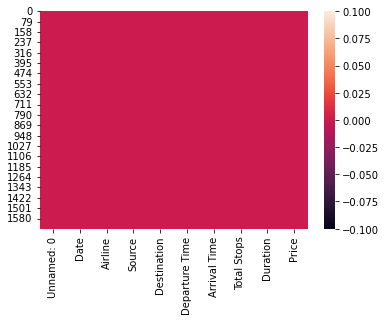

In [9]:
sns.heatmap(df.isnull())

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)  #dropping the index column

In [5]:
# creating a separate columns for the month, date and year 

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)


df.head()

,Date,Airline,Source,Destination,Departure Time,Arrival Time,Total Stops,Duration,Price,Month,Day,Year
0,2022-06-30,GoFirst,BOM,BLR,06:00,07:40,direct,1h 40m,5281,6,30,2022
1,2022-06-30,Vistara,BOM,BLR,16:30,18:15,direct,1h 45m,4843,6,30,2022
2,2022-06-30,AirAsia India,BOM,BLR,21:20,23:10,direct,1h 50m,4518,6,30,2022
3,2022-06-30,Vistara,BOM,BLR,06:00,07:50,direct,1h 50m,4843,6,30,2022
4,2022-01-07,Vistara,BOM,BLR,16:30,18:15,direct,1h 45m,5072,1,7,2022


In [6]:
#dropping the date of journey column as we have separate columns for date, month & year

df.drop('Date',axis=1,inplace=True)

### Univariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'GoFirst'),
  Text(1, 0, 'Vistara'),
  Text(2, 0, 'AirAsia India'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'SpiceJet'),
  Text(6, 0, 'Hahn Air Systems'),
  Text(7, 0, 'Air Arabia'),
  Text(8, 0, 'Emirates'),
  Text(9, 0, 'Air India Express'),
  Text(10, 0, 'Qatar Airways'),
  Text(11, 0, 'FlexFlight')])

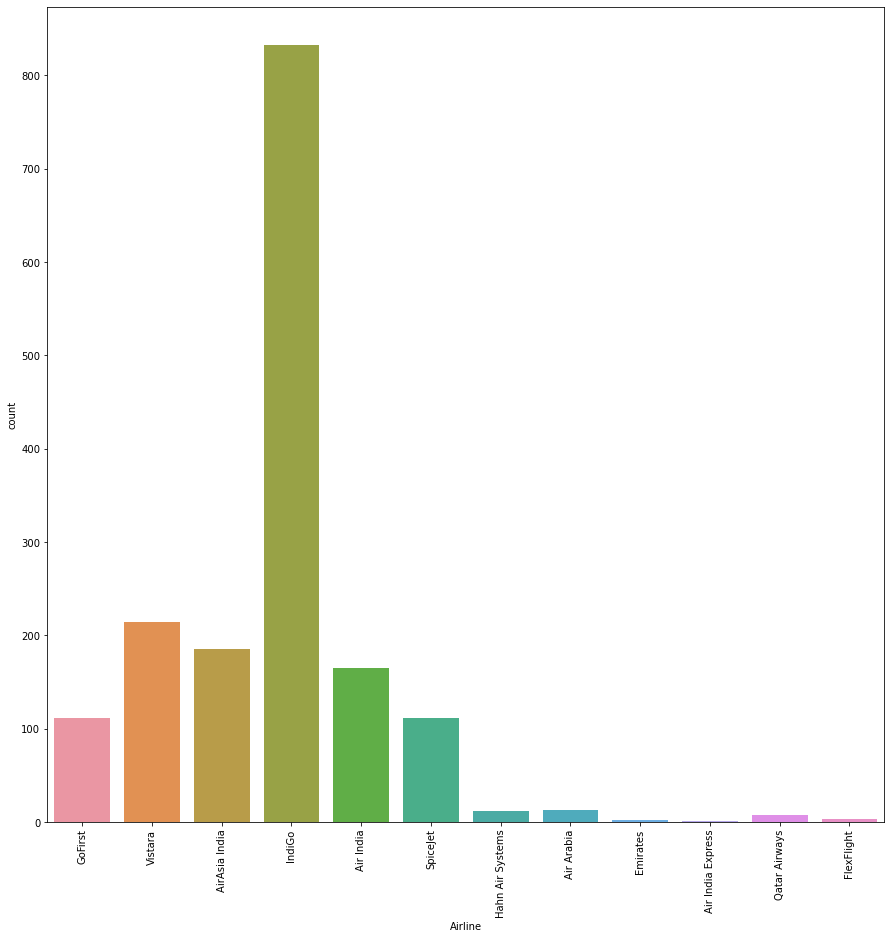

In [13]:
plt.figure(figsize=(15,15))
sns.countplot(df['Airline'])
plt.xticks(rotation=90)

We have a very large number of fights of IndiGo airline

<AxesSubplot:xlabel='Source', ylabel='count'>

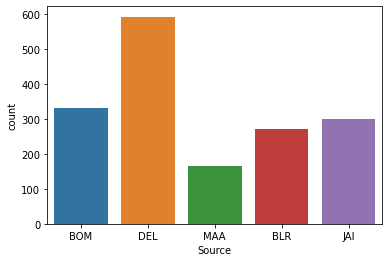

In [14]:
sns.countplot(df['Source'])

Contains more of the source of flight is Delhi

<AxesSubplot:xlabel='Destination', ylabel='count'>

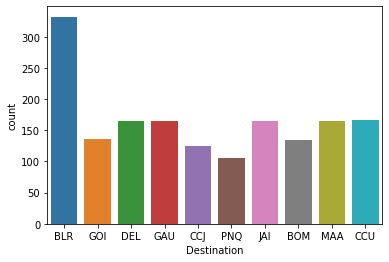

In [15]:
sns.countplot(df['Destination'])

Favourite Destination is Bengaluru

<AxesSubplot:xlabel='Total Stops', ylabel='count'>

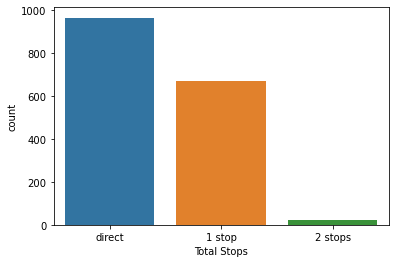

In [17]:
sns.countplot(df['Total Stops'])

Most of the flights are direct

<AxesSubplot:xlabel='Price', ylabel='Density'>

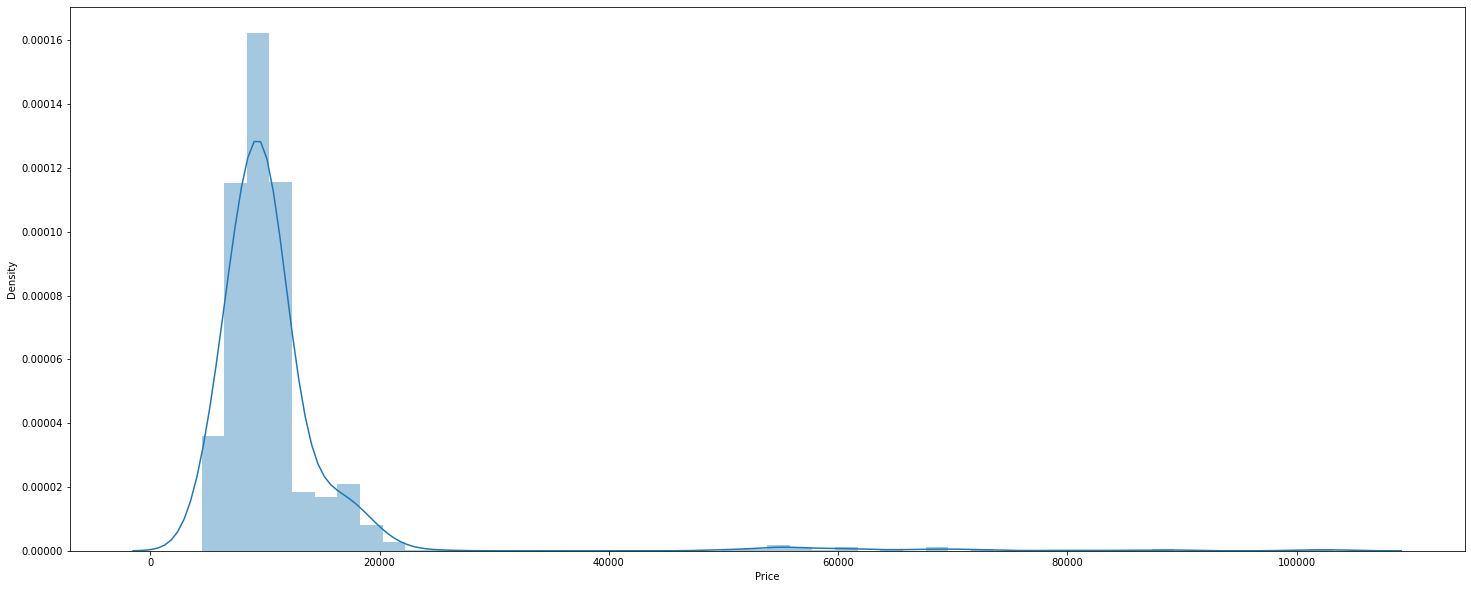

In [11]:
plt.figure(figsize=(25,10))
sns.distplot(df['Price'])

We have the price index less than 20000 a very low ratio is towards the higher side

### Bivariate Analysis

<AxesSubplot:xlabel='Month', ylabel='Price'>

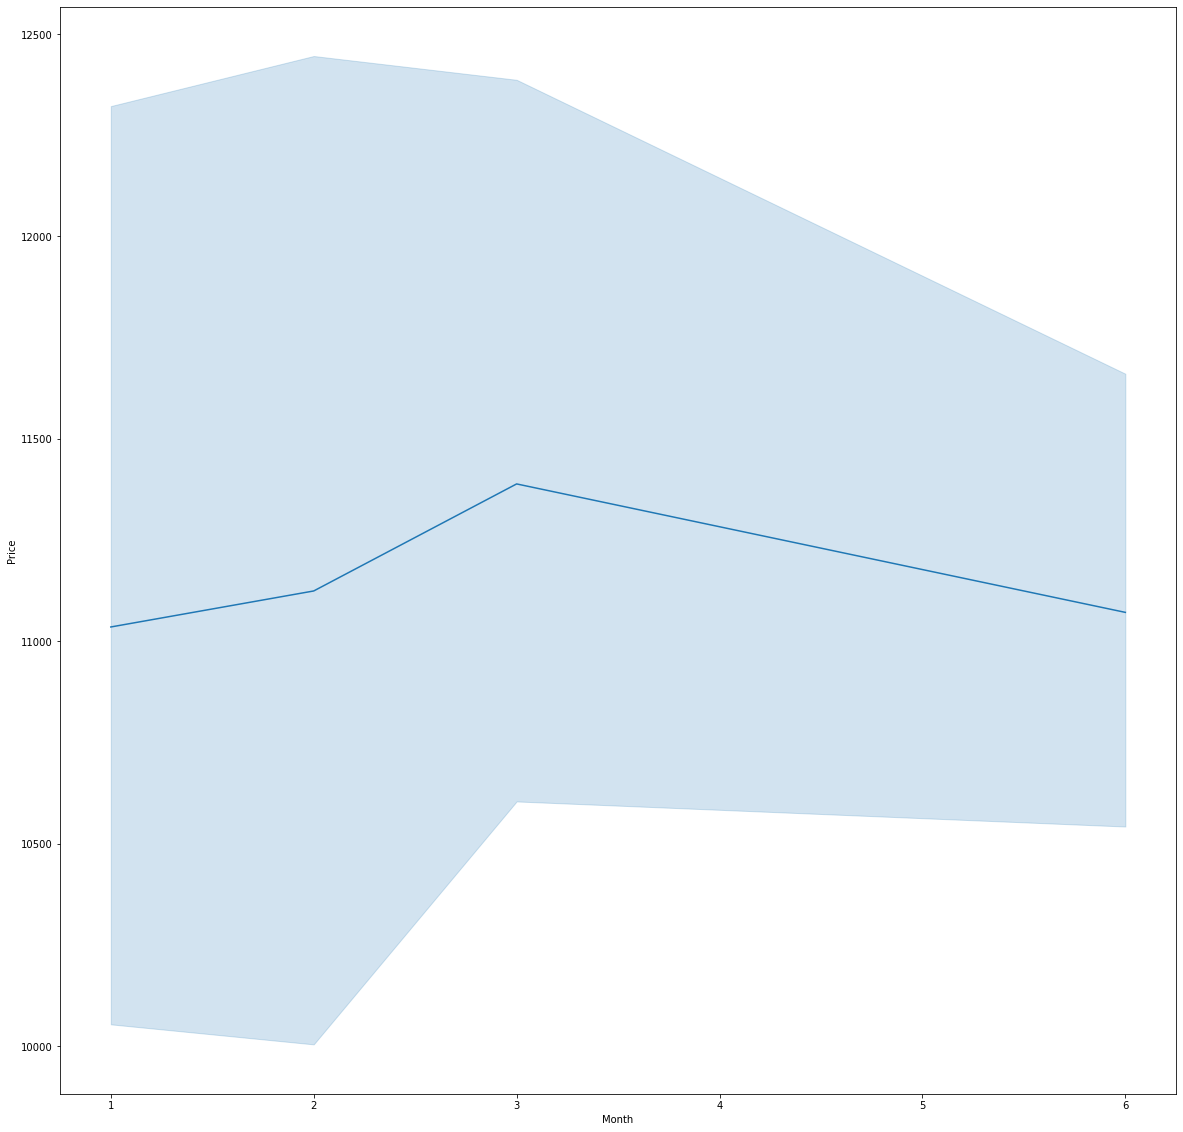

In [18]:
plt.figure(figsize=(20,20))
sns.lineplot(df['Month'],df['Price'])

Prices will increase with the month when we move toward the departure date prices will go up

<AxesSubplot:xlabel='Day', ylabel='Price'>

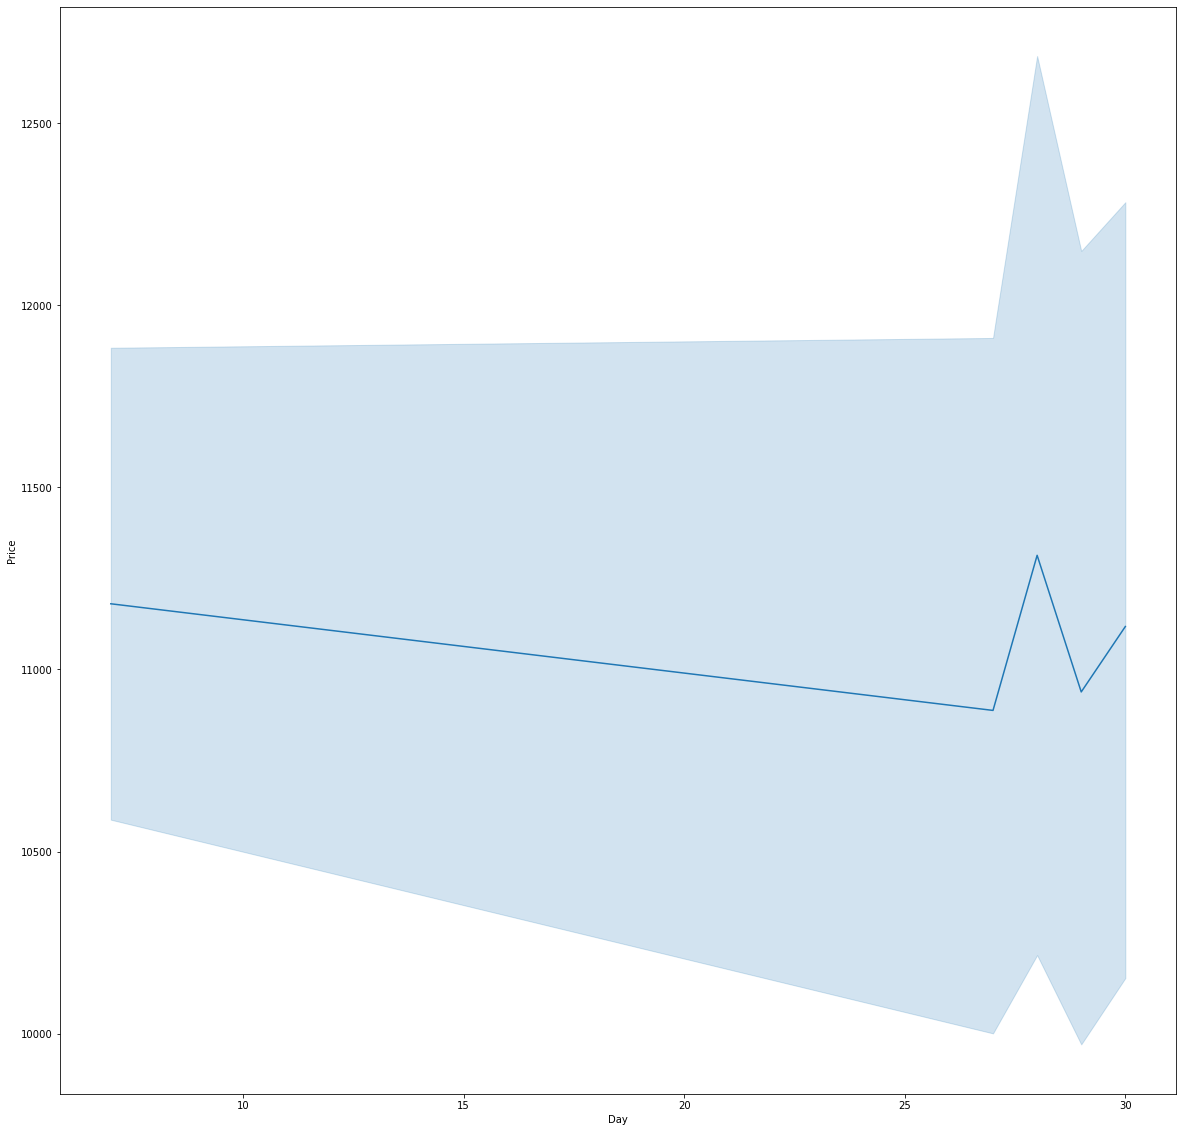

In [19]:
plt.figure(figsize=(20,20))
sns.lineplot(df['Day'],df['Price'])

If we book near the departure date them price will be high and drastically tends to higher side  

<AxesSubplot:xlabel='Total Stops', ylabel='Price'>

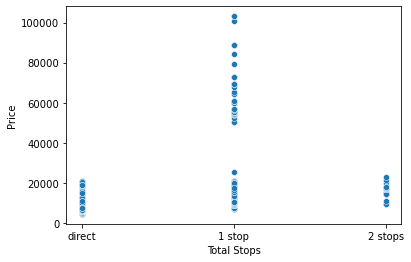

In [21]:
sns.scatterplot(df['Total Stops'],df['Price'])

1 stop flights is expensive than others

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

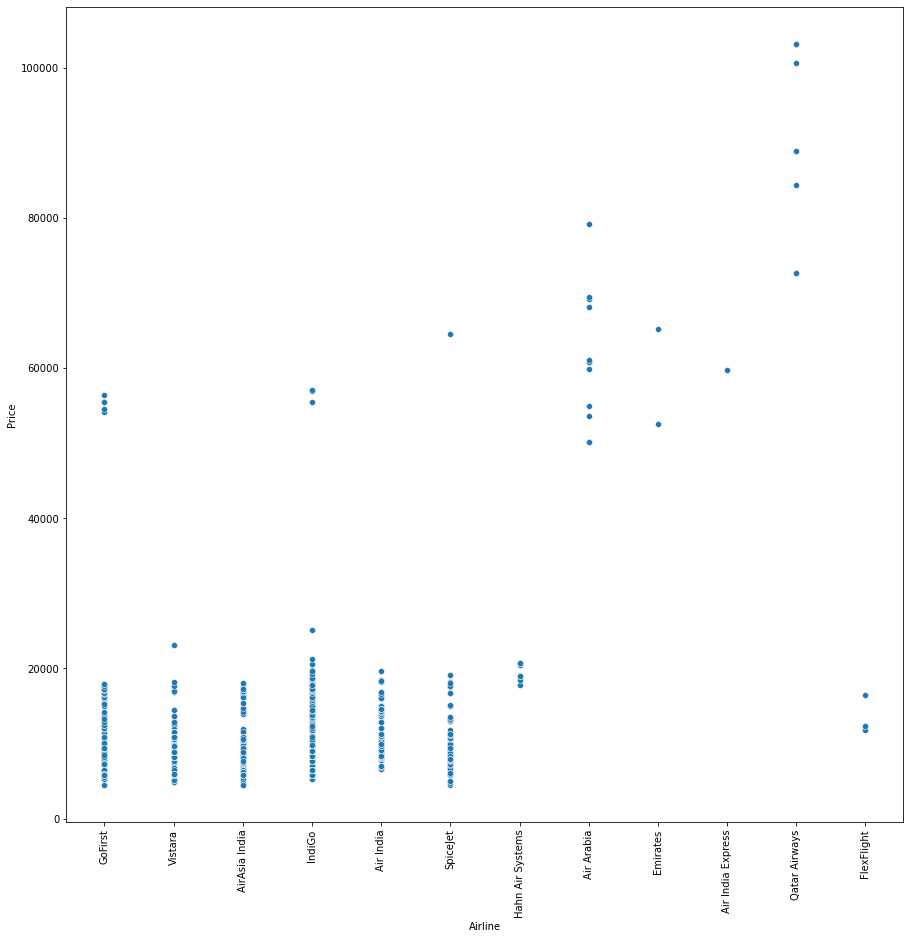

In [22]:
plt.figure(figsize=(15,15))
sns.scatterplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

Qatar airways is the most expensive airline followed by Air Arabia

<AxesSubplot:xlabel='Source', ylabel='Price'>

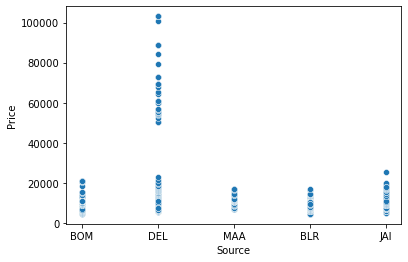

In [23]:
sns.scatterplot(df['Source'],df['Price'])

Flights taking off from Delhi Airport are expensive 

<AxesSubplot:xlabel='Destination', ylabel='Price'>

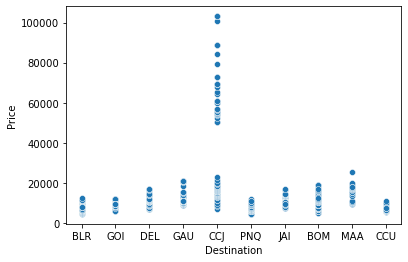

In [24]:
sns.scatterplot(df['Destination'],df['Price'])

Flights to Caliciut are expensive

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

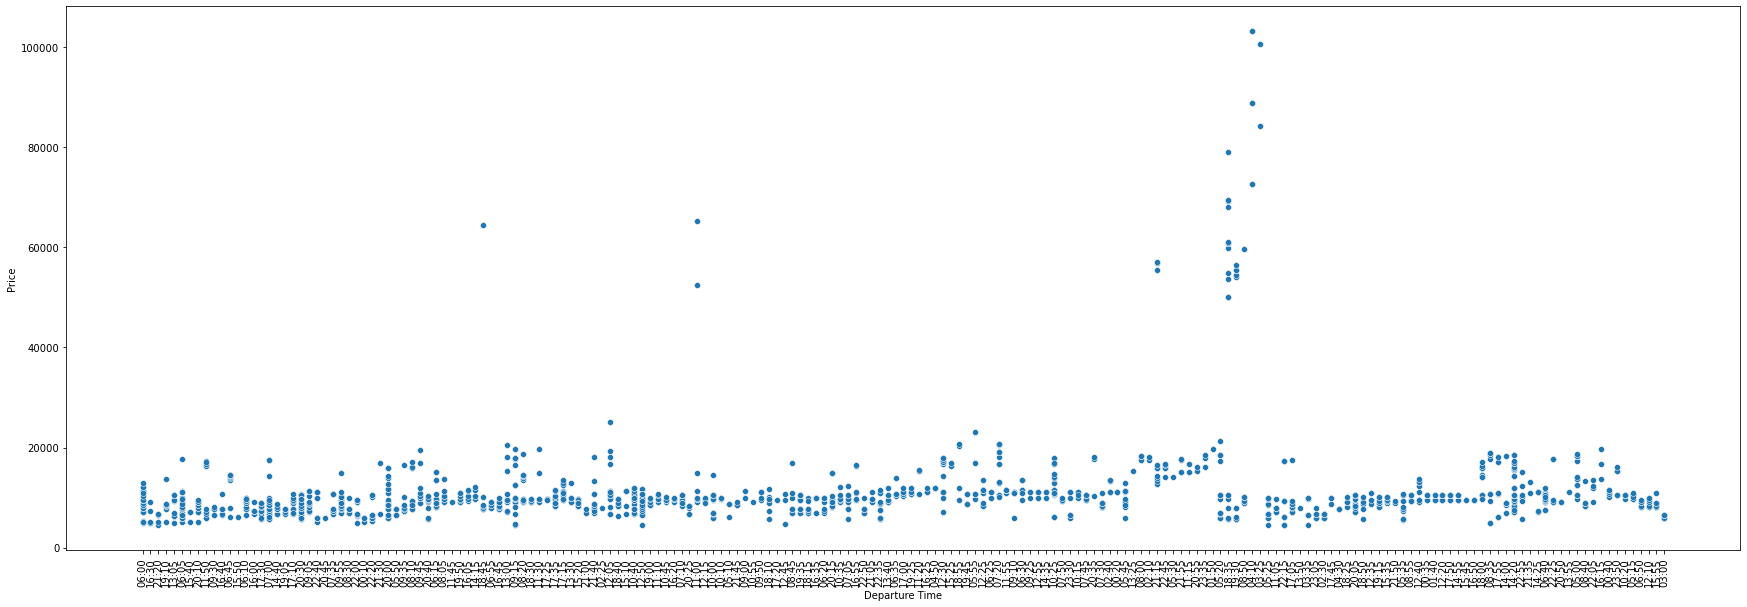

In [9]:
plt.figure(figsize=(30,10))
sns.scatterplot(df['Departure Time'],df['Price'])
plt.xticks(rotation=90)

Morning flights are expensive than night ones

### Multivariate Analysis

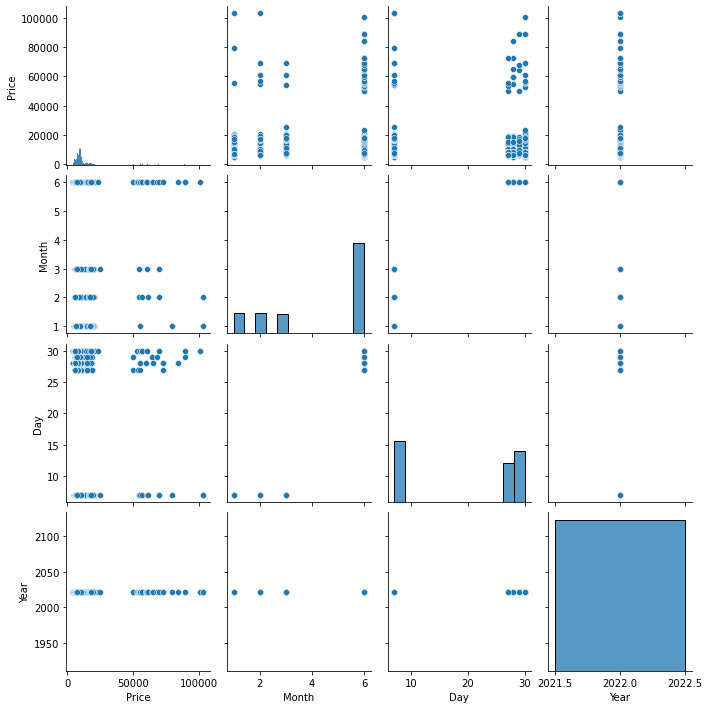

In [25]:
sns.pairplot(df)

### Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].astype(str))
df.head()

,Unnamed: 0,Date,Airline,Source,Destination,Departure Time,Arrival Time,Total Stops,Duration,Price
0,0,6,6,1,0,26,39,2,26,5281
1,1,6,11,1,0,122,128,2,27,4843
2,2,6,3,1,0,172,182,2,28,4518
3,3,6,11,1,0,26,41,2,28,4843
4,4,0,11,1,0,122,128,2,27,5072


### Statistical Summary

In [13]:
df.describe()

,Airline,Source,Destination,Departure Time,Arrival Time,Total Stops,Duration,Price,Month,Day,Year
count,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.0
mean,7.054885,1.854644,3.981906,93.720748,97.010856,1.176719,49.043426,11115.148372,4.388420,19.976478,2022.0
std,3.008137,1.187332,2.973171,54.439004,53.282849,0.978101,24.728933,8765.293715,2.034088,10.672784,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4468.000000,1.000000,7.000000,2022.0
25%,6.000000,1.000000,1.000000,44.000000,53.000000,0.000000,31.000000,8090.000000,2.000000,7.000000,2022.0
50%,8.000000,2.000000,4.000000,89.000000,94.000000,2.000000,40.000000,9719.000000,6.000000,27.000000,2022.0
75%,8.000000,3.000000,7.000000,144.000000,143.750000,2.000000,69.000000,11076.000000,6.000000,29.000000,2022.0
max,11.000000,4.000000,9.000000,192.000000,188.000000,2.000000,114.000000,103171.000000,6.000000,30.000000,2022.0


- total counts is 1658
- outliers are present
- skewness is present in few of the rows

In [14]:
corr=df.corr()
corr

,Airline,Source,Destination,Departure Time,Arrival Time,Total Stops,Duration,Price,Month,Day,Year
Airline,1.000000,0.032143,-0.002251,-0.025788,0.077850,0.002855,0.043339,-0.108848,-0.011771,-0.013870,NaN
Source,0.032143,1.000000,-0.220595,0.084877,0.042055,0.021093,0.074025,0.078710,0.038134,0.037305,NaN
Destination,-0.002251,-0.220595,1.000000,-0.049081,-0.041317,-0.349205,0.300138,-0.025082,-0.015103,-0.023540,NaN
Departure Time,-0.025788,0.084877,-0.049081,1.000000,0.263584,0.079132,-0.078060,-0.017722,0.005411,0.000650,NaN
Arrival Time,0.077850,0.042055,-0.041317,0.263584,1.000000,0.065517,0.033204,-0.079892,0.041829,0.046865,NaN
Total Stops,0.002855,0.021093,-0.349205,0.079132,0.065517,1.000000,-0.731882,-0.341945,-0.006615,-0.008678,NaN
Duration,0.043339,0.074025,0.300138,-0.078060,0.033204,-0.731882,1.000000,0.156940,-0.016605,-0.015211,NaN
Price,-0.108848,0.078710,-0.025082,-0.017722,-0.079892,-0.341945,0.156940,1.000000,-0.003263,-0.005817,NaN
Month,-0.011771,0.038134,-0.015103,0.005411,0.041829,-0.006615,-0.016605,-0.003263,1.000000,0.963881,NaN
Day,-0.013870,0.037305,-0.023540,0.000650,0.046865,-0.008678,-0.015211,-0.005817,0.963881,1.000000,NaN


In [15]:
df.drop('Year',axis=1,inplace=True)  #dropping the year column as it has no significance

<AxesSubplot:>

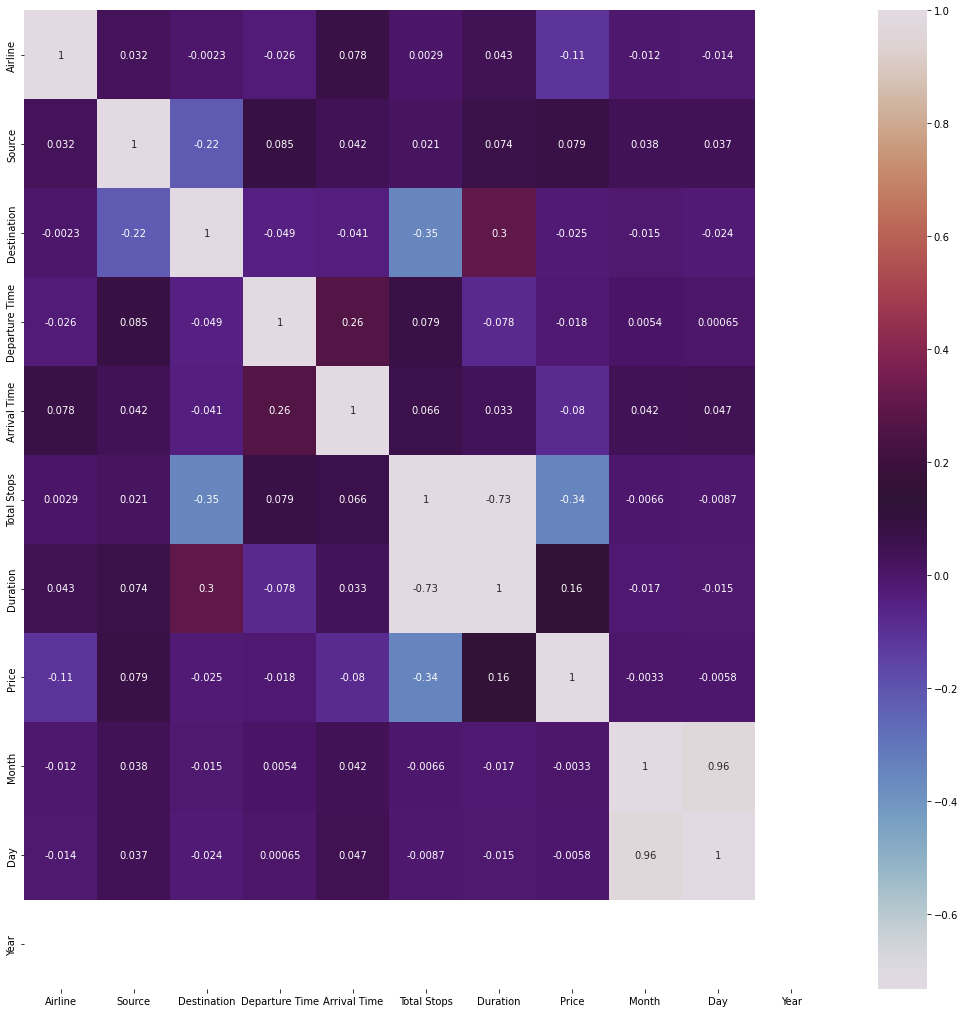

In [16]:
plt.figure(figsize=(18,18))  #plotting the correlation using the heatmap
sns.heatmap(corr,annot=True,cmap='twilight')

In [17]:
corr['Price'].sort_values()  #sorting the correlation with the target variable

Total Stops      -0.341945
Airline          -0.108848
Arrival Time     -0.079892
Destination      -0.025082
Departure Time   -0.017722
Day              -0.005817
Month            -0.003263
Source            0.078710
Duration          0.156940
Price             1.000000
Year                   NaN
Name: Price, dtype: float64

### Checking the skewness

In [18]:
df.skew()

Airline          -0.823673
Source            0.055134
Destination       0.095113
Departure Time    0.124377
Arrival Time     -0.045236
Total Stops      -0.359391
Duration          0.720345
Price             6.407139
Month            -0.591159
Day              -0.380465
dtype: float64

Very less skewness is present in the dataset except the price column

### Plotting the outliers

Airline               AxesSubplot(0.125,0.71587;0.227941x0.16413)
Source             AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Destination        AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Departure Time       AxesSubplot(0.125,0.518913;0.227941x0.16413)
Arrival Time      AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Total Stops       AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Duration             AxesSubplot(0.125,0.321957;0.227941x0.16413)
Price             AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Month             AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Day                     AxesSubplot(0.125,0.125;0.227941x0.16413)
dtype: object

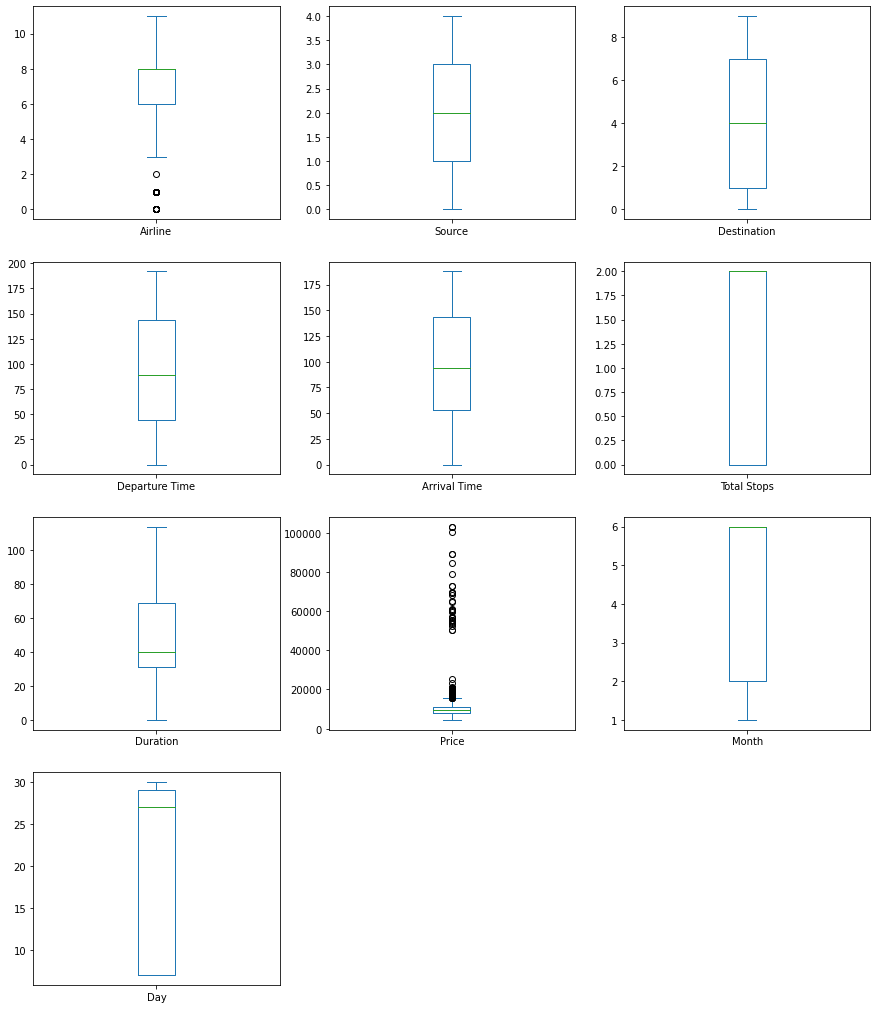

In [19]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(15,18))

### Removing the outliers

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901,
       902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914,
       915, 916, 917, 918, 919, 920, 921], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64))


(1625, 10)

### Model Building

In [22]:
df=df[['Airline', 'Source', 'Destination', 'Departure Time', 'Arrival Time',
       'Duration', 'Total Stops',  'Month', 'Day','Price']]

In [23]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
#importing the different machine learning models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [25]:
# defining the different models

lg=LinearRegression()
rdr=RandomForestRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

#### Finding the best random state

In [26]:
model=[lg,rdr,svr,dtr,knr]
maxAcc=0
maxRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is', maxAcc , 'on random state', maxRS)

Best Accuracy score is 0.3999963569827626 on random state 49


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,test_size=.20)

#### Linear Regression

In [28]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=r2_score(y_test,pred1)
print('Accuracy Score: ',acc)

Accuracy Score:  0.3999963569827626


#### Decision Tree Regressor

In [29]:
dtr.fit(x_train,y_train)
pred2=dtr.predict(x_test)
acc=r2_score(y_test,pred2)
print('Accuracy Score: ',acc)

Accuracy Score:  0.7719937778616296


#### Support Vector Regressor

In [30]:
svr.fit(x_train,y_train)
pred3=svr.predict(x_test)
acc=r2_score(y_test,pred3)
print('Accuracy Score: ',acc)

Accuracy Score:  -0.01887564129226993


#### KNN Regression

In [31]:
knr.fit(x_train,y_train)
pred4=knr.predict(x_test)
acc=r2_score(y_test,pred4)
print('Accuracy Score: ',acc)

Accuracy Score:  0.5116525830272465


#### Random Forest Regression

In [32]:
rdr.fit(x_train,y_train)
pred5=rdr.predict(x_test)
acc=r2_score(y_test,pred5)
print('Accuracy Score: ',acc)

Accuracy Score:  0.8644094305461366


#### Lasso Regularization

In [33]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)
pred6=ls.predict(x_test)
acc=r2_score(y_test,pred6)
print('Accuracy Score: ',acc)

Accuracy Score:  0.3999359120075674


#### Ridge Regularization

In [34]:
from sklearn.linear_model import Ridge
rg=Ridge()
rg.fit(x_train,y_train)
pred7=rg.predict(x_test)
acc=r2_score(y_test,pred7)
print('Accuracy Score: ',acc)

Accuracy Score:  0.399907003614267


### Cross Val Score

In [36]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(dtr,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  -195.90701276676333
at cv=  4
cross val score =  -89.12894509058178
at cv=  5
cross val score =  -128.80149369635566
at cv=  6
cross val score =  -209.47089388457152


### Hypermeter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'criterion':['squared_error','absolute_error','poisson'],
      'max_features':['sqrt','log2'],
      'max_depth':[2,3,4,5]}

GCV=GridSearchCV(rdr,param,cv=6,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'squared_error', 'max_depth': 2, 'max_features': 'sqrt'}

In [40]:
GCV_pred=GCV.best_estimator_.predict(x_test)  #predicting the price using the best parameters of RDR Model
r2_score(y_test,GCV_pred)

0.4221434482352

In [41]:
#FOR DTR

from sklearn.model_selection import GridSearchCV
# creating parameters
param={'criterion':['squared_error','absolute_error','poisson','friedman_mse'],
      'max_features':['sqrt','log2','auto'],
      'max_depth':[2,3,4,5],
      'splitter':['best','random']}

GCV=GridSearchCV(dtr,param,cv=6,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [42]:
GCV_pred=GCV.best_estimator_.predict(x_test)  #predicting the price using the best parameters of DTR Model
r2_score(y_test,GCV_pred)

0.3451241549083278

#### Finding the errors

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
l1=[pred1,pred2,pred3,pred4,pred5]
for i in l1:
    print('error:')

    print('mean absolute error: ',mean_absolute_error(y_test,i))
    print('mean squared error: ',mean_squared_error(y_test,i))
    print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,i)))
    print('\n')

error:
mean absolute error:  1794.8207609838125
mean squared error:  5837340.255178413
root mean squared error:  2416.058826928354


error:
mean absolute error:  726.2338461538461
mean squared error:  2218236.363076923
root mean squared error:  1489.374487184779


error:
mean absolute error:  2222.0349512737425
mean squared error:  9912479.474337496
root mean squared error:  3148.409038599892


error:
mean absolute error:  1531.7563076923077
mean squared error:  4751054.545723077
root mean squared error:  2179.691387725124


error:
mean absolute error:  752.1484394871794
mean squared error:  1319139.139414963
root mean squared error:  1148.537826723597




We have least errors for Random Forest Regression Model

### Saving the model

In [44]:
import pickle
filename='flight_price_model.pkl'
pickle.dump(rdr, open(filename,'wb'))

### Conclusion

In [45]:
a=np.array(y_test)
pred=np.array(pred5)
Flight_Price=pd.DataFrame({'Actual':a,'Predicted':pred})
Flight_Price

,Actual,Predicted
0,11076,11076.00
1,7964,8181.72
2,16686,16992.98
3,7984,8510.42
4,10695,10490.31
...,...,...
320,9077,10249.75
321,7332,8432.69
322,10495,10689.36
323,10695,10596.91


Hence, we see our model predicting the vlaues of price more or less near to actual value